In [1]:
from tools import Actor, Critic, DDPG_Agent, ReplayBuffer, device, PlotTool
from unityagents import UnityEnvironment
import numpy as np
import random
import torch
from collections import deque

from tqdm import tqdm_notebook as tqdm
from ipywidgets import *
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib notebook

## Load the Enviornment

In [ ]:
env         = UnityEnvironment(file_name="../Reacher_Linux_2/Reacher.x86_64", no_graphics=True)
brain_name  = env.brain_names[0]
brain       = env.brains[brain_name]
env_info    = env.reset(train_mode=True)[brain_name]

In [3]:
num_agents  = len(env_info.agents)
action_size = brain.vector_action_space_size
state_size  = len(env_info.vector_observations[0])
print("state size:",state_size, "action size:", action_size)

state size: 33 action size: 4


## Train the Agent

<IPython.core.display.Javascript object>


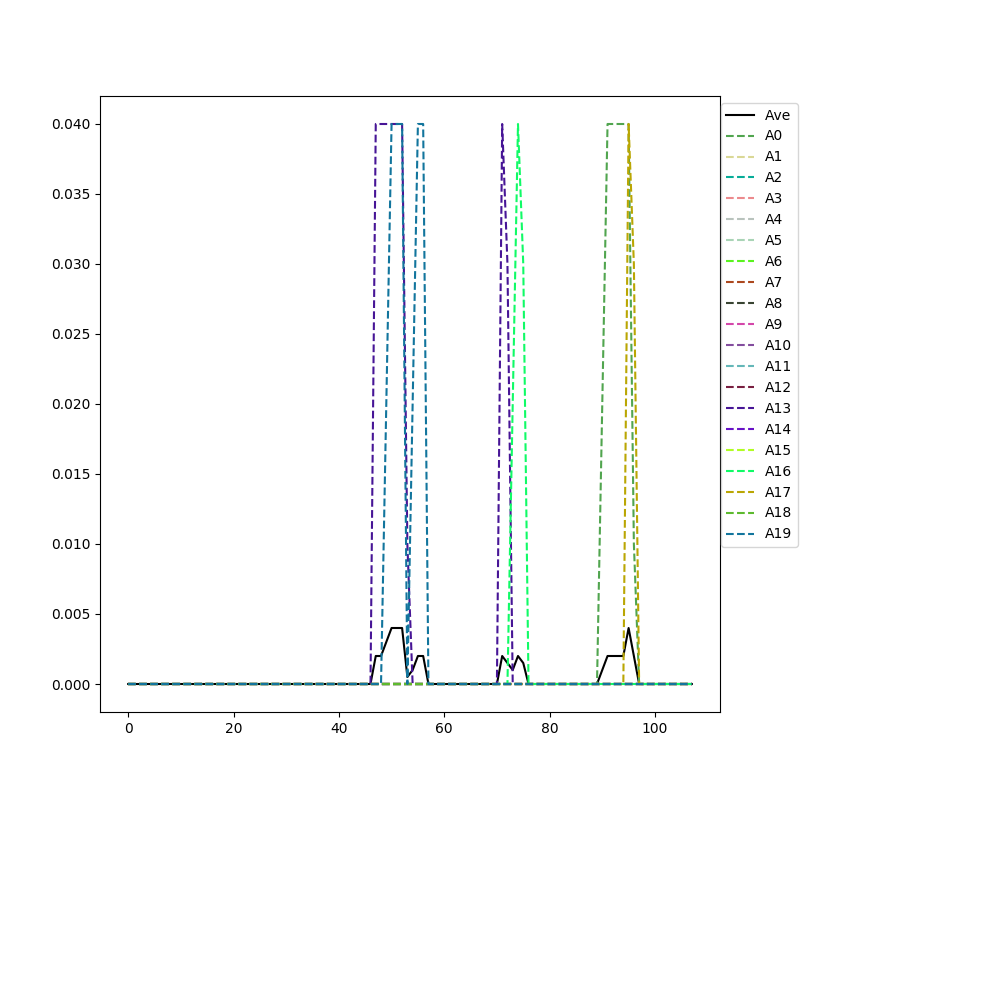

In [4]:
%matplotlib notebook
plotter = PlotTool(number_agents=num_agents)

In [5]:
agent = DDPG_Agent(state_size=state_size, action_size=action_size, num_agents= num_agents, seed=0)

In [6]:
def ddpg(n_episodes=1000, max_t=300, print_every=100):
    scores_deque = deque(maxlen=print_every)
    scores = []
    score = np.zeros(num_agents)
    
    # commenting and plotting
    desc = Label('Episode {}\tAverage Score: {:.2f}'.format(0,0))
    display(desc)
    tqm = tqdm(range(1, n_episodes+1))
    for i_episode in tqm:
        env_info    = env.reset(train_mode=False)[brain_name]
        states      = env_info.vector_observations
        agent.reset()
        score = 0
        for t in range(max_t):
            actions  = agent.act(states)
            env_info = env.step(actions)[brain_name]
            next_state = env_info.vector_observations
            reward = env_info.rewards
            done = env_info.local_done
            agent.step(state      = states,
                       action     = actions,
                       reward     = reward,
                       next_state = next_state, 
                       done       = done
                      )
            plotter.update_plot(np.array(env_info.rewards).reshape(1, num_agents))
            state = next_state
            score = score + np.array(reward)
            if np.any(done):
                break 
        scores_deque.append(score)
        scores.append(score)
        score_mean_circular = np.mean(scores_deque)
        desc.value = 'Episode {},'.format(i_episode)+ \
                     '\tMinimum Score: {:.2f},'.format(np.min(scores_deque))+ \
                     '\tAverage Score: {:.2f},'.format(score_mean_circular)
        
        
        if score_mean_circular > 35:
            # enough training
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
            
    return scores

scores = ddpg(n_episodes=1, max_t=300)

Label(value='Episode 0\tAverage Score: 0.00')

(tensor([[ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.7011],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.8482],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.9477],
        ...,
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.8368],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.2053],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.1641]],
       device='cuda:0'), tensor([[ 0.2332, -0.6512,  0.2732,  0.1319],
        [ 0.3897,  0.0200,  0.2181, -0.0285],
        [-0.1205,  0.1785, -0.5818,  0.0755],
        ...,
        [ 0.0618,  0.2780,  0.2084, -0.2294],
        [ 0.4562,  0.2344,  0.3965,  0.1103],
        [-0.0111, -0.1597, -0.0049,  0.1052]], device='cuda:0'), tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        

(tensor([[ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.6644],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.0523],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.0554],
        ...,
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.8482],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.0076],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.5222]],
       device='cuda:0'), tensor([[ 0.1858, -0.0130,  0.0798,  0.2691],
        [-0.5047,  0.2733,  0.8787, -0.0943],
        [ 0.1923,  0.0720,  0.3150,  0.0480],
        ...,
        [ 0.3904,  0.2906,  0.4689,  0.6128],
        [-0.0759,  0.1024,  0.2239,  0.1279],
        [ 0.3680,  0.3515, -0.1330, -0.1103]], device='cuda:0'), tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        

(tensor([[ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.2053],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.5222],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.5447],
        ...,
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.0554],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.0076],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.2749]],
       device='cuda:0'), tensor([[ 0.6360,  0.3279,  0.1800,  0.2210],
        [ 0.1760,  0.0307, -0.6097, -0.4023],
        [ 0.0523, -0.1437, -0.0091,  0.5285],
        ...,
        [-0.1355,  0.1753, -0.0748,  0.1742],
        [-0.1893,  0.4094,  0.0818, -0.3365],
        [ 0.2898, -0.0758, -0.0240,  0.3371]], device='cuda:0'), tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        

(tensor([[ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.7011],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.1641],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.8368],
        ...,
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.8482],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.2199],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.6644]],
       device='cuda:0'), tensor([[-0.2009, -0.1424,  0.0308, -0.0940],
        [ 0.1805,  0.3695, -0.2059,  0.0460],
        [-0.2890, -0.0399,  0.6410, -0.0248],
        ...,
        [ 0.2296,  0.0832,  0.1567,  0.1422],
        [ 0.4072, -0.6719,  0.3288, -0.5425],
        [-0.0526, -0.1903,  0.3273, -0.0177]], device='cuda:0'), tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        

(tensor([[ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.0554],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.3332],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.0076],
        ...,
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.2486],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.6346],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.6644]],
       device='cuda:0'), tensor([[-0.5537, -0.0164, -0.0129,  0.1112],
        [ 0.3169, -0.2016,  0.1657,  0.0998],
        [ 0.1938,  0.3159,  0.1393,  0.1736],
        ...,
        [ 0.0193, -0.3884,  0.5447, -0.1974],
        [ 0.2488, -0.2032, -0.2427,  0.2554],
        [-0.2055,  0.4580,  0.2720,  1.3032]], device='cuda:0'), tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        

(tensor([[ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.2199],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.7011],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.0554],
        ...,
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.8368],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.6644],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.2053]],
       device='cuda:0'), tensor([[ 0.5245, -0.6190,  0.2607, -0.1830],
        [-0.0999, -0.3078,  0.0026,  0.1378],
        [-0.1948, -0.0503, -0.0610, -0.1157],
        ...,
        [-0.4383,  0.3193,  0.8608, -0.2581],
        [-0.0411,  0.1354, -0.0889,  0.8573],
        [ 0.4777,  0.0853, -0.0073,  0.3893]], device='cuda:0'), tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        

(tensor([[ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00, -8.3678e-01],
        [ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00, -8.4818e-01],
        [ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00,  1.6410e-01],
        ...,
        [ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00,  9.4769e-01],
        [ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00,  1.7878e-03],
        [ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00, -7.1473e-01]], device='cuda:0'), tensor([[-0.2495,  0.0688,  0.9094, -0.4590],
        [ 0.3629,  0.0884,  0.3582,  0.2954],
        [ 0.0389,  0.3164,  0.0731,  0.0936],
        ...,
        [-0.1422,  0.1519,  0.3668, -0.3527],
        [-0.0508, -0.0643,  0.1527,  0.3833],
        [-0.1793,  1.2533,  0.2636,  0.3172]], device='cuda:0'), tensor([[0.],
        [0.],
        [0.],

(tensor([[ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00,  3.3321e-01],
        [ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00,  1.7878e-03],
        [ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00, -5.2300e-02],
        ...,
        [ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00, -5.2221e-01],
        [ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00, -7.0105e-01],
        [ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00, -2.1990e-01]], device='cuda:0'), tensor([[ 0.5857, -0.1250,  0.0509, -0.3920],
        [-0.3297, -0.1820,  0.9092,  0.3373],
        [-0.4381,  0.1003,  0.7454,  0.0784],
        ...,
        [ 0.2643,  0.2179,  0.0144, -0.1249],
        [-0.2174, -0.4980, -0.0924,  0.3282],
        [ 0.4588, -0.1330,  0.0581,  0.2156]], device='cuda:0'), tensor([[0.],
        [0.],
        [0.],

(tensor([[ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.6644],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.1641],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.5222],
        ...,
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.0076],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.0076],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.8368]],
       device='cuda:0'), tensor([[ 0.0065,  0.1574, -0.1480,  0.8637],
        [-0.6095, -0.1473,  0.0775, -0.1763],
        [ 0.1446,  0.0240, -0.4473, -0.6347],
        ...,
        [-0.0348,  0.3655,  0.0237, -0.1019],
        [ 0.2282,  0.3828, -0.0280, -0.2808],
        [ 0.2364,  0.2488,  0.1617, -0.2809]], device='cuda:0'), tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        

(tensor([[ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.5222],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.9477],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.0523],
        ...,
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.2749],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.2486],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.5447]],
       device='cuda:0'), tensor([[ 0.0782, -0.1403, -0.6093, -0.5086],
        [ 0.1574, -0.3176, -0.4058, -0.0386],
        [-0.0516,  0.1023,  0.0473, -0.0998],
        ...,
        [ 0.2246,  0.0945, -0.4530,  0.0870],
        [-0.2674, -0.4723,  0.4771,  0.1602],
        [-0.2729, -0.4868, -0.1976,  0.2764]], device='cuda:0'), tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        

(tensor([[ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00,  1.6410e-01],
        [ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00, -8.3678e-01],
        [ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00, -5.5375e-02],
        ...,
        [ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00, -8.4818e-01],
        [ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00,  1.7878e-03],
        [ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00, -7.0105e-01]], device='cuda:0'), tensor([[-0.4791, -0.0707,  0.1035, -0.0460],
        [-0.3410,  0.6729,  0.6538,  0.3120],
        [ 0.0152, -0.0868, -0.2733,  0.2667],
        ...,
        [ 0.0756, -0.0891,  0.1031,  0.1974],
        [-0.4466,  0.2336,  0.2305,  0.2109],
        [ 0.2831, -0.5302,  0.0727, -0.2854]], device='cuda:0'), tensor([[0.],
        [0.],
        [0.],

(tensor([[ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.8482],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.6346],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.2053],
        ...,
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.8368],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.0554],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.2053]],
       device='cuda:0'), tensor([[ 0.4981,  0.0549,  0.4122,  0.1202],
        [ 0.2710,  0.2852,  0.1085,  0.0126],
        [ 0.4185,  0.4109,  0.1312,  0.0516],
        ...,
        [ 0.3694,  0.0176, -0.1502,  0.2179],
        [-0.2118, -0.1264, -0.1752,  0.0705],
        [ 0.4894,  0.1281,  0.1662,  0.2048]], device='cuda:0'), tensor([[0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000]

(tensor([[ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.0523],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.2053],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.7147],
        ...,
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.6644],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.6644],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.1641]],
       device='cuda:0'), tensor([[-0.7793,  0.3400,  0.9364,  0.2827],
        [ 0.4894,  0.1281,  0.1662,  0.2048],
        [ 0.2108,  0.6665,  0.3299,  0.2229],
        ...,
        [-0.0987,  0.3135,  0.1034,  1.0717],
        [-0.0060,  0.2628,  0.1133,  0.6920],
        [-0.3724,  0.2167,  0.0539,  0.2811]], device='cuda:0'), tensor([[0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0400],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000]

(tensor([[ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.7011],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.3332],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.8482],
        ...,
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.8657],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.3332],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.5222]],
       device='cuda:0'), tensor([[-0.1318, -0.3594,  0.0709, -0.2114],
        [ 0.2659, -0.2127,  0.0474, -0.2097],
        [-0.0174,  0.2142,  0.2771,  0.0969],
        ...,
        [-0.2219,  0.0701,  0.2382, -0.0131],
        [ 0.4645, -0.1690, -0.1844, -0.1939],
        [ 0.3928,  0.1500, -0.4468, -0.3292]], device='cuda:0'), tensor([[0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000]

(tensor([[ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.5447],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.3332],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.8368],
        ...,
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.1641],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.6644],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.2199]],
       device='cuda:0'), tensor([[ 0.0523, -0.1437, -0.0091,  0.5285],
        [ 0.5591, -0.3440, -0.0695, -0.3648],
        [-0.1504,  0.5654,  0.7864,  0.2394],
        ...,
        [-0.0991, -0.0176,  0.3692, -0.0842],
        [ 0.1858, -0.0130,  0.0798,  0.2691],
        [ 0.8299, -0.1110, -0.1274, -0.0438]], device='cuda:0'), tensor([[0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000]

(tensor([[ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.2199],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.5447],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.2749],
        ...,
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.5222],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.5222],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.2199]],
       device='cuda:0'), tensor([[ 0.4588, -0.1330,  0.0581,  0.2156],
        [-0.0440, -0.2809, -0.1715, -0.1068],
        [-0.1995,  0.0177,  0.1922, -0.0633],
        ...,
        [ 0.2316, -0.1142, -0.7867, -0.4615],
        [ 0.2717,  0.1057, -0.6827, -0.4275],
        [ 0.1030,  0.1507,  0.1694,  0.1370]], device='cuda:0'), tensor([[0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000]

(tensor([[ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.2486],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.6644],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.8482],
        ...,
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.2053],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.8482],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.9477]],
       device='cuda:0'), tensor([[ 0.4736, -0.4060, -0.2298, -0.2155],
        [ 0.1858, -0.0130,  0.0798,  0.2691],
        [ 0.7021,  0.0932, -0.0354,  0.0764],
        ...,
        [ 0.4777,  0.0853, -0.0073,  0.3893],
        [ 0.2390, -0.1149,  0.0903,  0.0546],
        [ 0.3251, -0.0686,  0.2648, -0.0047]], device='cuda:0'), tensor([[0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000]

(tensor([[ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.6644],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.6346],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.2199],
        ...,
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.8657],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.0076],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.8657]],
       device='cuda:0'), tensor([[-0.1534, -0.1966,  0.3936,  0.3126],
        [ 0.1975, -0.2687, -0.0676,  0.2628],
        [ 0.8917, -0.0151, -0.4241, -0.5240],
        ...,
        [-0.9473,  0.1106, -0.0964,  0.1716],
        [ 0.1243,  0.5219,  0.9823, -0.3801],
        [-0.2628, -0.1320, -0.3875, -0.1670]], device='cuda:0'), tensor([[0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000]

(tensor([[ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00,  3.3321e-01],
        [ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00, -6.3462e-01],
        [ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00, -5.2300e-02],
        ...,
        [ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00,  1.7878e-03],
        [ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00, -5.2221e-01],
        [ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00,  6.6445e-01]], device='cuda:0'), tensor([[ 0.5655,  0.0424,  0.2282, -0.0864],
        [-0.0622,  0.1340,  0.2292,  0.0262],
        [-1.1660,  0.4179,  0.2903, -0.0602],
        ...,
        [-0.3443,  0.0143,  0.3980,  0.2685],
        [ 0.2316, -0.1142, -0.7867, -0.4615],
        [-0.2055,  0.4580,  0.2720,  1.3032]], device='cuda:0'), tensor([[0.0000],
        [0.0000],
     

(tensor([[ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.1641],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.1641],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.6346],
        ...,
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.0523],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.0076],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.2053]],
       device='cuda:0'), tensor([[-0.1637, -0.2635,  0.1142,  0.0360],
        [-0.2929, -0.2616,  0.1906, -0.1784],
        [-0.2983,  0.0448,  0.3849,  0.4238],
        ...,
        [-0.9468,  0.4150,  0.1921,  0.2769],
        [-0.1606,  0.3932,  0.0494, -0.2871],
        [-0.2519, -0.0506,  0.1214, -0.0413]], device='cuda:0'), tensor([[0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000]

(tensor([[ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.2486],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.2053],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.7011],
        ...,
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.7147],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.2199],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.1641]],
       device='cuda:0'), tensor([[ 0.1520, -0.3283, -0.1409, -0.2382],
        [ 0.6155, -0.0143, -0.4489,  0.0470],
        [ 0.2831, -0.5302,  0.0727, -0.2854],
        ...,
        [ 0.3273,  0.3432,  0.3421,  0.3675],
        [ 0.4407, -0.1956, -0.2103, -0.8403],
        [-0.3920, -0.7293,  0.4008, -0.1228]], device='cuda:0'), tensor([[0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000]

(tensor([[ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.7147],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.6346],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.7147],
        ...,
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.8482],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.6346],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.2486]],
       device='cuda:0'), tensor([[ 0.1720,  0.5345,  0.3045,  0.1048],
        [ 0.5848, -0.0215, -0.5479,  0.4320],
        [ 0.2061,  0.7029,  0.2887,  0.3004],
        ...,
        [ 0.0804, -0.0927,  0.2367,  0.0141],
        [-0.4660, -0.0917,  0.4503,  0.3284],
        [-0.2142, -0.5165,  0.1531, -0.2059]], device='cuda:0'), tensor([[0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000]

(tensor([[ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.0554],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.8657],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.5222],
        ...,
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.2749],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.3332],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.2486]],
       device='cuda:0'), tensor([[-0.3304,  0.0518,  0.1180, -0.2453],
        [-0.2572, -0.0843, -0.5176, -0.0418],
        [-0.0868,  0.0824, -0.4654, -0.5527],
        ...,
        [ 0.0451,  0.3480, -0.1325,  0.0133],
        [ 0.7080, -0.0744,  0.4161,  0.0945],
        [-0.0322, -0.2564,  0.1900, -0.3968]], device='cuda:0'), tensor([[0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000]

(tensor([[ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.6346],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.3332],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.8482],
        ...,
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.7011],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.5447],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.7011]],
       device='cuda:0'), tensor([[ 0.0171,  0.0375,  0.1006,  0.0200],
        [ 0.5966, -0.5181, -0.0808, -0.4254],
        [ 0.2356, -0.0150,  0.1311, -0.0147],
        ...,
        [-0.2114, -0.6984, -0.2340,  0.5896],
        [-0.3068, -0.4436, -0.5230, -0.1201],
        [ 0.0970, -0.3295,  0.1382,  0.3103]], device='cuda:0'), tensor([[0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000]

(tensor([[ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.2199],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.5222],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.7011],
        ...,
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.0076],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.8657],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.0554]],
       device='cuda:0'), tensor([[ 0.5540,  0.3994, -0.3757, -0.7454],
        [-0.0763, -0.0151, -0.7474, -0.5576],
        [ 0.3315, -0.4040,  0.0247, -0.2964],
        ...,
        [-0.2083,  0.3335,  0.4805,  0.0556],
        [-0.2579,  0.0231,  0.1369, -0.0088],
        [-1.0218,  0.1184, -0.0879, -0.3291]], device='cuda:0'), tensor([[0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000]

(tensor([[ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00,  1.7878e-03],
        [ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00, -5.2300e-02],
        [ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00, -5.4470e-01],
        ...,
        [ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00,  2.4865e-01],
        [ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00, -5.2300e-02],
        [ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00,  2.7490e-01]], device='cuda:0'), tensor([[ 0.0673,  0.1188,  0.2611,  0.2752],
        [ 0.0050, -0.0394, -0.1273,  0.7087],
        [-0.1922, -0.4232, -0.4410, -0.0487],
        ...,
        [ 0.1771, -0.5082,  0.7164, -0.3390],
        [-0.5609, -0.0368, -0.1570, -0.5411],
        [ 0.0437, -0.1499, -0.1872, -0.0018]], device='cuda:0'), tensor([[0.0000],
        [0.0000],
     

(tensor([[ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.5447],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.1641],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.8657],
        ...,
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.2199],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.6346],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.2749]],
       device='cuda:0'), tensor([[-0.4582, -0.1366, -0.7326,  0.1676],
        [-0.7617,  0.2330,  0.0747, -0.0715],
        [-0.9560, -0.0559, -0.0805,  0.3168],
        ...,
        [ 0.5352, -0.6720, -0.0636, -0.3166],
        [ 0.4708,  0.5227,  0.0429,  0.0954],
        [ 0.2173,  0.2180, -0.4125,  0.3709]], device='cuda:0'), tensor([[0.0400],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000]

(tensor([[ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.1641],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.0523],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.8368],
        ...,
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.8657],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.9477],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.7147]],
       device='cuda:0'), tensor([[-0.3396, -0.6247,  0.3865, -0.2605],
        [-0.6997, -0.0578, -0.0415, -0.4973],
        [-0.0162,  0.4607,  0.3606,  0.6007],
        ...,
        [-0.5450, -0.1861, -0.2423, -0.0099],
        [-0.0164,  0.1201, -0.2665, -0.1863],
        [ 0.1720,  0.5345,  0.3045,  0.1048]], device='cuda:0'), tensor([[0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000]

(tensor([[ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.0554],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.0554],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.0554],
        ...,
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.2053],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.7147],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.7011]],
       device='cuda:0'), tensor([[-0.8257,  0.2928, -0.0940, -0.7033],
        [-0.3412,  0.2243, -0.0427,  0.0284],
        [-0.2429,  0.1830, -0.3148,  0.1687],
        ...,
        [ 0.4617,  0.1080,  0.3559,  0.0049],
        [ 0.4325,  0.1867, -0.0797,  0.6875],
        [-0.0238, -0.2458,  0.1791, -0.2410]], device='cuda:0'), tensor([[0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000]

(tensor([[ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.3332],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.9477],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.2199],
        ...,
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.8368],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.5447],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.2749]],
       device='cuda:0'), tensor([[ 0.4744,  0.2167,  0.0973, -0.2105],
        [-0.8593, -0.2898, -0.1904,  0.8074],
        [ 0.3895,  0.0638, -0.3448, -0.2100],
        ...,
        [ 0.1671,  0.0120, -0.3215,  0.3027],
        [ 0.4052, -0.6633,  0.1756,  0.0368],
        [-0.3367, -0.1748, -0.2122,  0.1051]], device='cuda:0'), tensor([[0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000]

(tensor([[ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.9477],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.8657],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.8657],
        ...,
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.6644],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.8657],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.2199]],
       device='cuda:0'), tensor([[ 0.1340, -0.1068,  0.0992,  0.3870],
        [-0.5115, -0.0008, -0.1399,  0.1205],
        [-0.1148,  0.0205,  0.1302,  0.0190],
        ...,
        [ 0.1697,  0.6390, -0.2979,  0.0177],
        [ 0.1305, -0.2893, -0.0536,  0.1943],
        [ 0.5540,  0.3994, -0.3757, -0.7454]], device='cuda:0'), tensor([[0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000]

(tensor([[ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.5222],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.5447],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.0554],
        ...,
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.8482],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.9477],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.0554]],
       device='cuda:0'), tensor([[ 0.1042,  0.0298, -0.6465, -0.3042],
        [-0.6224,  0.0494, -0.4169,  0.2458],
        [-0.2369,  0.4340, -0.0384, -0.1423],
        ...,
        [-0.0174,  0.2142,  0.2771,  0.0969],
        [ 0.5258,  0.1399,  0.0116,  0.0182],
        [-0.1634, -0.2140,  0.0069,  0.1925]], device='cuda:0'), tensor([[0.0000],
        [0.0400],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0200],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000]

(tensor([[ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.8657],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.3332],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.2749],
        ...,
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.6346],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.6346],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.2199]],
       device='cuda:0'), tensor([[-0.4492,  0.6063, -0.4519,  0.4719],
        [ 0.3169, -0.2016,  0.1657,  0.0998],
        [ 0.0506,  0.2992, -0.2293,  0.4786],
        ...,
        [ 0.3115,  0.5041,  0.0781,  0.3515],
        [-0.3564, -0.0318,  0.3500, -0.0306],
        [ 0.4875,  0.3298, -0.1893, -0.7379]], device='cuda:0'), tensor([[0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000]

(tensor([[ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.8482],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.0076],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.8657],
        ...,
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.8482],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.7011],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.2199]],
       device='cuda:0'), tensor([[-0.2554,  0.0787,  0.8214,  0.0884],
        [ 0.0117,  0.3101,  0.3767,  0.2769],
        [-0.1015,  0.1460, -0.3208, -0.2884],
        ...,
        [-0.1188,  0.1322,  0.4058, -0.1065],
        [ 0.0172, -0.3947,  0.0477, -0.4695],
        [ 0.5245, -0.6190,  0.2607, -0.1830]], device='cuda:0'), tensor([[0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000]

(tensor([[ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.8657],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.8482],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.7011],
        ...,
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.2749],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.2053],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.7011]],
       device='cuda:0'), tensor([[-0.2817,  0.5981, -0.2927,  0.3447],
        [-0.0935,  0.5324,  0.3805,  0.6006],
        [ 0.2553, -0.3493,  0.2586,  0.2959],
        ...,
        [-0.2500,  0.0331, -0.1476, -0.0124],
        [-0.4917, -0.3938, -0.6196, -0.3147],
        [ 0.5018,  0.0637, -0.3604,  0.2995]], device='cuda:0'), tensor([[0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000]

(tensor([[ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00,  1.7878e-03],
        [ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00,  6.6445e-01],
        [ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00,  2.7490e-01],
        ...,
        [ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00, -2.0530e-01],
        [ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00,  1.6410e-01],
        [ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00,  6.6445e-01]], device='cuda:0'), tensor([[ 0.1769,  0.1561,  0.4519,  0.1815],
        [-0.0627, -0.0708,  0.5799,  0.3808],
        [ 0.1236,  0.0725, -0.2583,  0.2107],
        ...,
        [-0.2939, -0.4769, -0.5189, -0.3399],
        [-0.3729,  0.0512,  0.0351, -0.1508],
        [ 0.1312,  0.0170, -0.0561,  0.0556]], device='cuda:0'), tensor([[0.0000],
        [0.0000],
     

(tensor([[ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00,  1.7878e-03],
        [ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00,  2.7490e-01],
        [ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00, -2.1990e-01],
        ...,
        [ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00,  2.7490e-01],
        [ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00,  2.4865e-01],
        [ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00, -7.1473e-01]], device='cuda:0'), tensor([[-0.1966, -0.0283,  0.8213,  0.1200],
        [ 0.3283,  0.1417, -0.2800,  0.2621],
        [-0.0431,  0.0053,  0.0408, -0.0187],
        ...,
        [-0.0821, -0.0634, -0.3139, -0.3506],
        [ 0.1160, -1.0284,  0.6271, -0.2875],
        [ 0.0785,  0.6110,  0.3175,  0.3527]], device='cuda:0'), tensor([[0.0000],
        [0.0000],
     

(tensor([[ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.7011],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.8368],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.2053],
        ...,
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.2749],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.5222],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.6346]],
       device='cuda:0'), tensor([[ 0.0970, -0.3295,  0.1382,  0.3103],
        [-0.2623,  0.3211,  0.6484, -0.1367],
        [ 0.4185,  0.4109,  0.1312,  0.0516],
        ...,
        [ 0.1929, -0.1950, -0.0660,  0.2721],
        [ 0.0761, -0.0093, -0.5870, -0.5795],
        [-0.2771, -0.4809, -0.4000,  0.0644]], device='cuda:0'), tensor([[0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0100],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000]

(tensor([[ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.2749],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.2199],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.0523],
        ...,
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.3332],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.8657],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.0076]],
       device='cuda:0'), tensor([[-0.2755,  0.3188,  0.0725, -0.0063],
        [ 0.3116, -0.5614, -0.1501, -0.1540],
        [-0.9594,  0.4817, -0.0722, -0.1635],
        ...,
        [ 0.3537,  0.2172, -0.2799,  0.0238],
        [-0.2913,  0.5900, -0.5420,  0.3566],
        [ 0.1243,  0.5219,  0.9823, -0.3801]], device='cuda:0'), tensor([[0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000]

(tensor([[ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.0523],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.3332],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.2749],
        ...,
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.2053],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.2199],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.6346]],
       device='cuda:0'), tensor([[-0.1187,  0.1475,  0.2002,  0.4553],
        [ 0.4645, -0.1690, -0.1844, -0.1939],
        [ 0.0806,  0.2118, -0.5122,  0.5928],
        ...,
        [ 0.6155, -0.0143, -0.4489,  0.0470],
        [ 0.3111,  0.4313, -0.1552, -0.1971],
        [ 0.1975, -0.2687, -0.0676,  0.2628]], device='cuda:0'), tensor([[0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000]

(tensor([[ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.0554],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.2486],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.8657],
        ...,
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.5222],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.6346],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.8368]],
       device='cuda:0'), tensor([[-0.1948, -0.0503, -0.0610, -0.1157],
        [ 0.0569, -0.9062,  0.5184, -0.3591],
        [-0.3803,  0.5368, -0.3276,  0.5957],
        ...,
        [ 0.2643,  0.2179,  0.0144, -0.1249],
        [-0.3272, -0.4325, -0.4475,  0.0757],
        [-0.0804,  0.1268,  0.9030, -0.2831]], device='cuda:0'), tensor([[0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000]

(tensor([[ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.2749],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.0523],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000,  0.9477],
        ...,
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.7147],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.0076],
        [ 0.0000, -4.0000,  0.0000,  ...,  1.0000,  0.0000, -0.0076]],
       device='cuda:0'), tensor([[ 0.1421,  0.0615, -0.4960,  0.3279],
        [-1.0095,  0.3459,  0.0545,  0.1572],
        [-0.3009, -0.1046,  0.0856, -0.2093],
        ...,
        [ 0.1720,  0.5345,  0.3045,  0.1048],
        [ 0.0020,  0.5987,  1.0183, -0.2570],
        [-0.1914,  0.4858,  0.0127, -0.1052]], device='cuda:0'), tensor([[0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0100],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000]

(tensor([[ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00, -5.2221e-01],
        [ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00, -8.4818e-01],
        [ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00,  3.3321e-01],
        ...,
        [ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00,  3.3321e-01],
        [ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00, -2.0530e-01],
        [ 0.0000e+00, -4.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00,  1.7878e-03]], device='cuda:0'), tensor([[-0.1992,  0.2849, -0.5413, -0.8392],
        [-0.0801, -0.3730,  0.3157, -0.2688],
        [ 0.5030, -0.4202,  0.0306, -0.3454],
        ...,
        [ 0.5655,  0.0424,  0.2282, -0.0864],
        [ 0.3048,  0.4865, -0.0791,  0.0924],
        [-0.3258, -0.0804,  0.6880,  0.1653]], device='cuda:0'), tensor([[0.0000],
        [0.0000],
     

KeyboardInterrupt: 